# Code to compute the Lyapunov Exponent for the logitic map

<IPython.core.display.Javascript object>


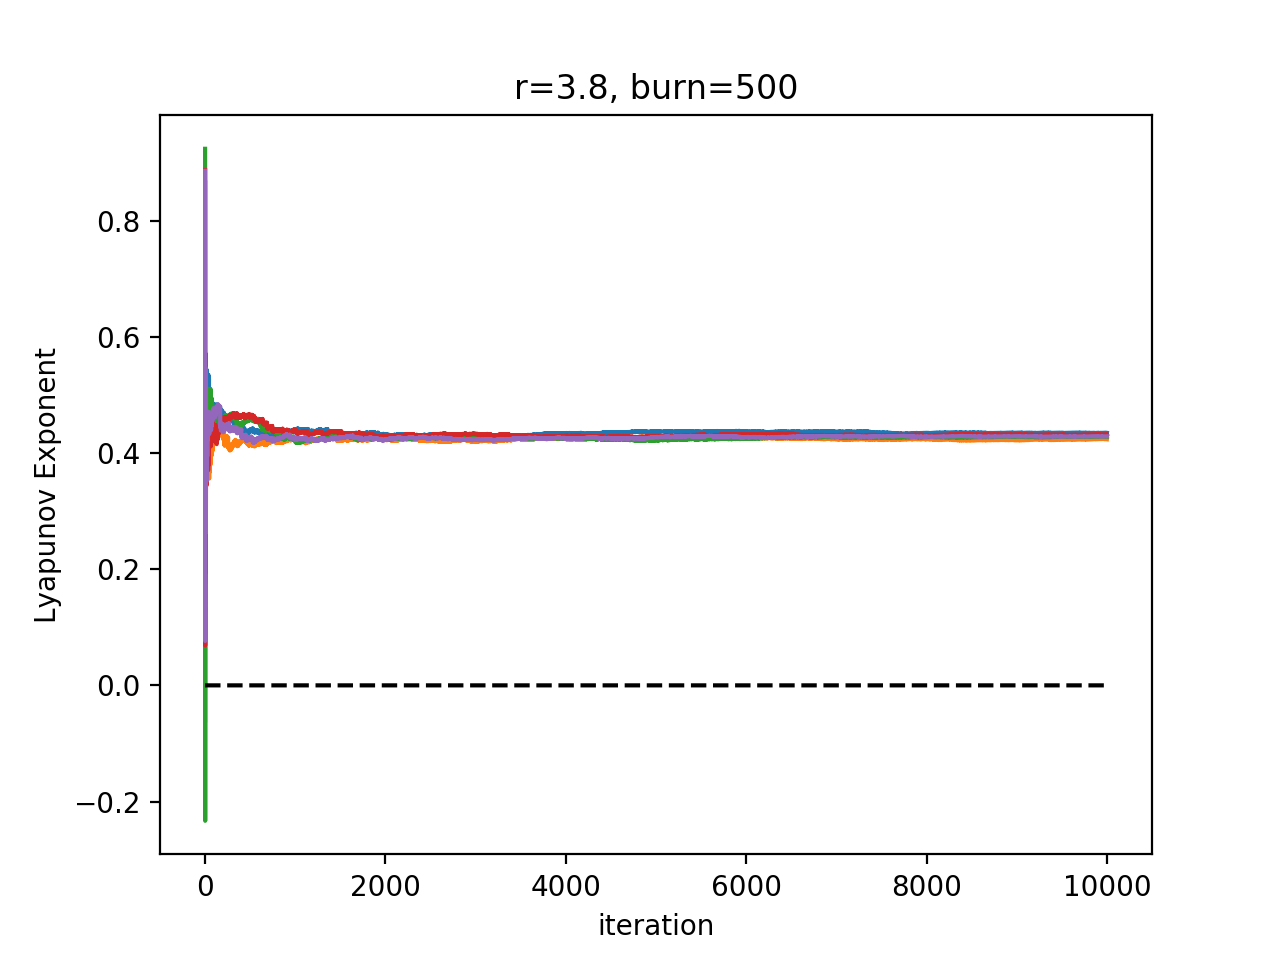

In [68]:
import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib notebook

def Logistic(x,r=1):
    return r*x*(1-x)

def DLogistic(x,r=1):
    return r*(1-2*x)

# compute exponent
r=3.8 # param
burn = 500 # burn period
num_it = 10000 # num iterations after burn period
num_IC = 5

plt.figure();
for ic in range(num_IC):
    x = np.random.uniform() # random initial condition
    S = np.empty(num_it) # log of Jacobian container
    t = 0
    while t < num_it+burn-1:
        t += 1
        x = Logistic(x,r=r)
        if t>=burn:
            S[t-burn] = np.log(abs(DLogistic(x,r=r)))
    plt.plot(S.cumsum()/np.arange(1,num_it+1))
plt.plot(np.arange(len(S)),np.zeros(len(S)),'k--')
plt.xlabel('iteration');
plt.ylabel('Lyapunov Exponent');
plt.title('r=%.1f, burn=%d' %(r,burn) );
        

## Compute LEs for a range of r

In [50]:
burn = 100 # burn period
num_it = 1000 # num iterations after burn period
num_r = 500
LEs = np.empty(num_r)
R = np.linspace(3,4,num_r)

for i,r in enumerate(R):
    S = 0
    x = np.random.uniform() # random initial condition
    t = 0
    while t < burn:
        t += 1
        x = Logistic(x,r=r)
    t = 0
    while t < num_it:
        t += 1
        x = Logistic(x,r=r)
        S += np.log(abs(DLogistic(x,r=r)))
    LEs[i] = S/num_it

<IPython.core.display.Javascript object>


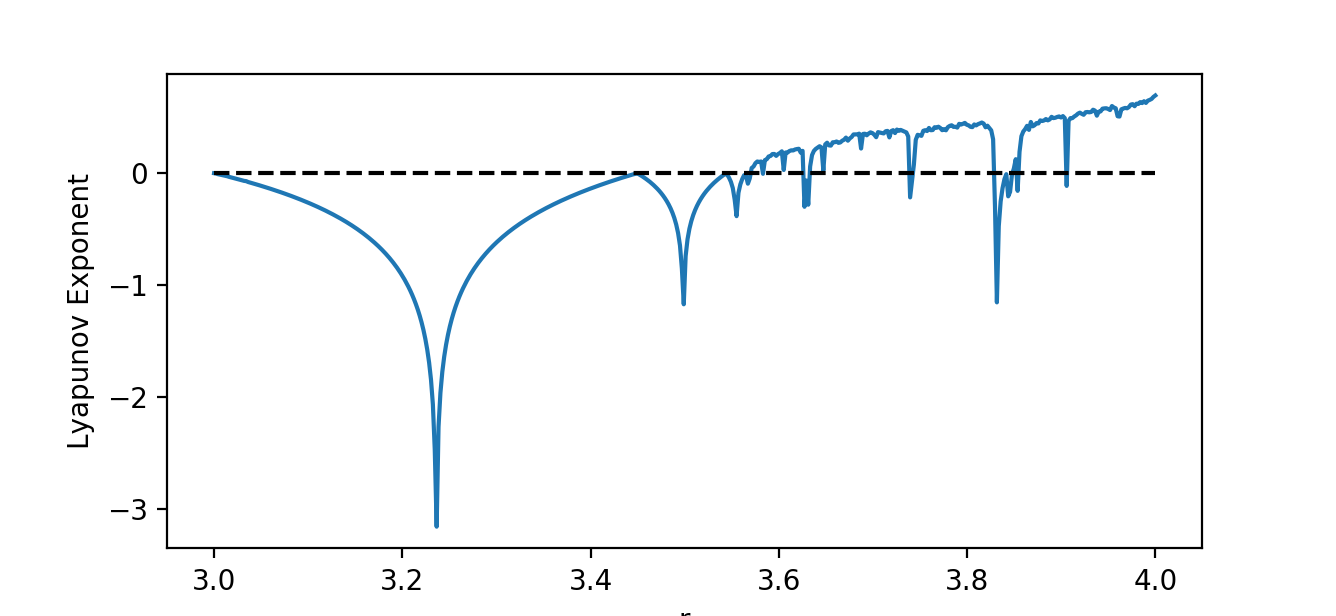

In [73]:
# plot results
plt.figure();
plt.plot(R,LEs);
plt.plot(R,0*R,'k--');
plt.xlabel('r');
plt.ylabel('Lyapunov Exponent');